In [2]:
from ocean_navigation_simulator.environment.PlatformState import (
    PlatformState,
    PlatformStateSet,
    SpatialPoint,
    SpatioTemporalPoint,
)
from ocean_navigation_simulator.utils import units
import numpy as np

In [74]:
def generate_point_in_area(lon_west, lon_east, lat_south, lat_north, nb_points) -> SpatialPoint:
    lon = np.random.uniform(min(lon_west, lon_east), max(lon_west, lon_east), size=nb_points)
    lat = np.random.uniform(min(lat_south, lat_north), max(lat_south, lat_north), size=nb_points)
    return SpatialPoint(units.Distance(deg=lon), units.Distance(deg=lat))

In [75]:
np.random.seed(0)
x_set_1 = generate_point_in_area(-96, -77, 19, 30, 10)
x_set_2 = generate_point_in_area(-96, -77, 19, 30, 10)
dist_euclidian = x_set_1.distance(x_set_2)
dist_haversine = x_set_1.haversine(x_set_2)
error_relative = np.abs(dist_euclidian.deg - dist_haversine.deg)/dist_haversine.deg
print(f"Euclidian distance between points: {dist_euclidian.km}")
print(f"Haversine distance between points: {dist_haversine.km}")
print(f"Relative error Euclidian - Haversine {error_relative*100} %")


Euclidian distance between points: [1112.94956216  348.3655915   328.15114769  661.9000537   647.89849377
  648.57095017  953.57303634  286.31543847  954.50125614  239.28831761]
Haversine distance between points: [1045.23760657  339.46730565  303.67504734  621.43082728  611.0979039
  648.55228402  923.21084143  281.79465084  844.3709675   237.33873801]
Relative error Euclidian - Haversine [6.47814001e+00 2.62124974e+00 8.05996428e+00 6.51226567e+00
 6.02204485e+00 2.87812684e-03 3.28876066e+00 1.60428440e+00
 1.30428796e+01 8.21433369e-01] %


In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

In [ ]:
np.random.seed(0)
from ocean_navigation_simulator.utils import units
x_set_1 = generate_point_in_area(-130, -125, 30, 35, 5)
x_set_2 = generate_point_in_area(-130, -125, 30, 35, 5)
dist_euclidian = x_set_1.distance(x_set_2).km
dist_haversine = haversine_np(x_set_1.lon.deg, x_set_1.lat.deg, x_set_2.lon.deg, x_set_2.lat.deg)
error = dist_euclidian - dist_haversine
print(f"Euclidian distance between points: {dist_euclidian}")
print(f"Haversine distance between points: {dist_haversine}")
print(f"Error Euclidian - Haversine {error}")

0.04499640028797696

/tmp/ipykernel_6762/546454723.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax0.pcolor(X,Y,Z0)
/tmp/ipykernel_6762/546454723.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax1.pcolor(X,Y,Z1)


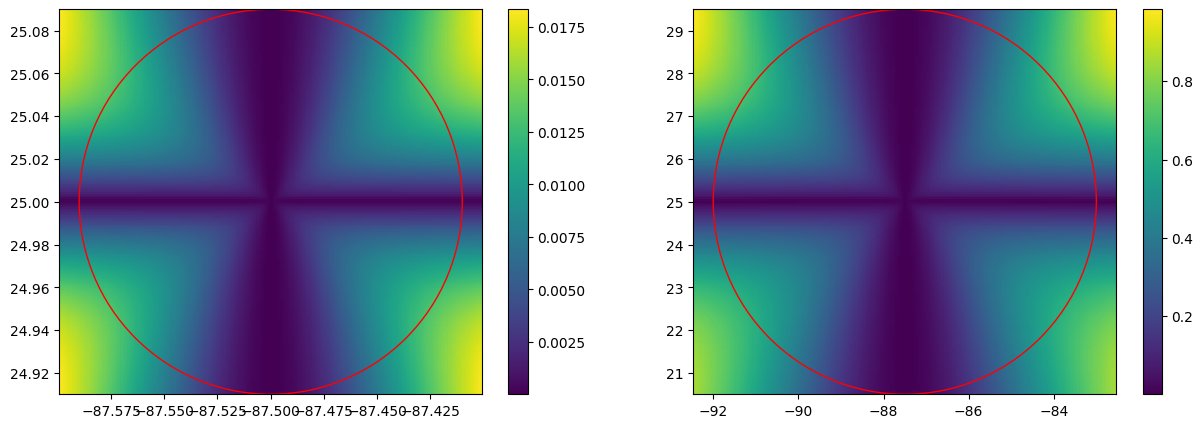

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def r(d):
    return d * np.pi / 180

def dist_hav(x, y, x0, y0):
    dlat = r(y - y0)
    dlon = r(x - x0)
    a = np.sin(dlat / 2)**2 + np.cos(r(y0)) * np.cos(r(y)) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return units.Distance(rad=c).km #6371 * c

def dist_eucl(x, y, x0, y0):
    return units.Distance(deg=np.sqrt(((x-x0)*np.cos(r(y0)))**2 + (y-y0)**2)).km

def dist_sim(x, y, x0, y0):
    return units.Distance(rad= np.sqrt(r(y - y0) ** 2 + (np.cos(r(y0)) * r(x - x0)) ** 2)).deg
    #return np.sqrt(r(y - y0) ** 2 + (np.cos(r(y0)) * r(x - x0)) ** 2) * 6371

def error(x, y, x0, y0):
    return np.abs(dist_hav(x, y, x0, y0) - dist_eucl(x, y, x0, y0))/ dist_hav(x, y, x0, y0) * 100

# sampling circle radius in KMS
r_km = np.array([10, 500])
r_deg = units.Distance(km=r_km).deg
nb_points = 200
# set up the figure and subplots
# set up the figure and subplots
fig = plt.figure(figsize=(15, 5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

lon_range_GOM = np.array([-97, -78])
lat_range_GOM = np.array([20, 30])
center_p = [lon_range_GOM.mean(), lat_range_GOM.mean()] # lon lat


# set the ranges and contour levels
x = np.linspace(center_p[0]-r_deg[0] / np.cos(r(center_p[1])),center_p[0]+ r_deg[0] / np.cos(r(center_p[1])), nb_points)
y = np.linspace(center_p[1] - r_deg[0], center_p[1] + r_deg[0], nb_points)
X, Y = np.meshgrid(x, y)
Z0 = error(X, Y, center_p[0], center_p[1])
# plot the heatmap
c = ax0.pcolor(X,Y,Z0)
fig.colorbar(c, ax=ax0)
circle1 = patches.Circle((center_p[0], center_p[1]), r_deg[0], fill=False, edgecolor='r')
ax0.add_patch(circle1)

x = np.linspace(center_p[0]-r_deg[1] / np.cos(r(center_p[1])),center_p[0]+ r_deg[1] / np.cos(r(center_p[1])), nb_points)
y = np.linspace(center_p[1] - r_deg[1], center_p[1] + r_deg[1], nb_points)
X, Y = np.meshgrid(x, y)
Z1 = error(X, Y, center_p[0], center_p[1])
# plot the heatmap
c = ax1.pcolor(X,Y,Z1)
fig.colorbar(c, ax=ax1)
circle1 = patches.Circle((center_p[0], center_p[1]), r_deg[1], fill=False, edgecolor='r')
ax1.add_patch(circle1)



In [9]:
error(-90.0200001, 23, -90.02, 23)

0.0

In [10]:
error(-90.4, 23, -90.02, 23)

1.0876025179129556e-05

In [11]:
dist_eucl(-90.4, 23, -90.02, 23)

38.868869739942355

In [12]:
dist_hav(-90.4, 23, -90.02, 23)

38.868858863917175

In [88]:
np.max(Z1)

10.447939418844891

In [ ]:
Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

In [ ]:
levels = np.linspace(0, 20, 6)

# plot the first subplot
#ax1.plot_surface(X, Y, Z, cmap='cubehelix_r', vmin=0, vmax=20)
heatmap = ax1.pcolormesh(X, Y, Z,cmap='viridis')
ax1.colorbar(heatmap)
ax1.set_title('Relative error at 89°N')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Relative error (%)')
ax1.set_zlim(0, 20)

# set the ranges and contour levels for the second subplot
x = np.linspace(-0.05 / np.cos(r(65)), 0.05 / np.cos(r(65)), 200)
y = np.linspace(65 - 0.05, 65 + 0.05, 200)
X, Y = np.meshgrid(x, y)
Z = error(X, Y, 0, 65)
levels = np.linspace(0, 20, 6)

# plot the second subplot
#ax2.plot_surface(X, Y, Z, cmap='cubehelix_r', vmin=0, vmax=20)
ax2.contour(X, Y, Z, levels=levels, colors='black')
ax2.set_title('Relative error at 65°N')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Relative error (%)')
ax2.set_zlim(0, 20)

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'

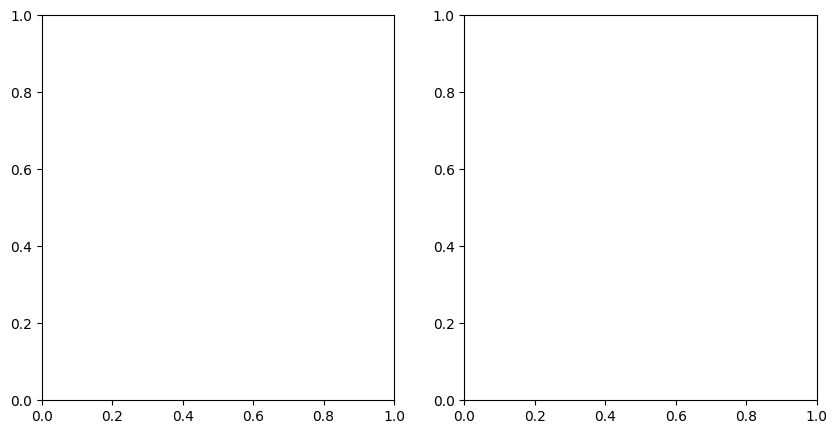

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def r(d):
    return d * np.pi / 180

def dist_hav(x, y, x0, y0):
    dlat = r(y - y0)
    dlon = r(x - x0)
    a = np.sin(dlat / 2)**2 + np.cos(r(y0)) * np.cos(r(y)) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c

def dist_sim(x, y, x0, y0):
    return 6371 * np.sqrt((r(y - y0)**2) + (np.cos(r(y0)) * (r(x - x0))**2))

def error(x, y, x0, y0):
    return 100 * np.abs(dist_hav(x, y, x0, y0) - dist_sim(x, y, x0, y0)) / dist_hav(x, y, x0, y0)

# set up the figure and subplots
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, )
ax2 = fig.add_subplot(1, 2, 2, )

# set the ranges and contour levels
x = np.linspace(-0.05 / np.cos(r(89)), 0.05 / np.cos(r(89)), 200)
y = np.linspace(89 - 0.05, 89 + 0.05, 200)
X, Y = np.meshgrid(x, y)
Z = error(X, Y, 0, 89)
heatmap = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Relative error (%)')
ax1.set_title('Relative error at 89°N')
# ax1.set_box_aspect((np.ptp(X), np.ptp(Y), np.ptp(Z)))
# ax1.set_aspect('auto')

y = np.linspace(65 - 0.05, 65 + 0.05, 200)
X, Y = np.meshgrid(x, y)
Z = error(X, Y, 0, 65)
heatmap = ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Relative error (%)')
ax2.set_title('Relative error at 65°N')
ax2.set_aspect('auto')

plt.show()

In [1]:
import numpy as np
import gnuplotlib as gp

# Define helper functions
r = lambda d: d * np.pi / 180
dist_hav = lambda x, y, x0, y0: 2 * np.arcsin(np.sqrt(np.sin(r(y - y0) / 2) ** 2 + np.cos(r(y0)) * np.cos(r(y)) * np.sin(r(x - x0) / 2) ** 2)) * 6371
dist_sim = lambda x, y, x0, y0: np.sqrt(r(y - y0) ** 2 + (np.cos(r(y0)) * r(x - x0)) ** 2) * 6371
error = lambda x, y, x0, y0: 100 * np.abs(dist_hav(x, y, x0, y0) - dist_sim(x, y, x0, y0)) / dist_hav(x, y, x0, y0)

# Define plot settings
term = "pngcairo font 'arial,8' size 640,350"
output = 'simple_distance.png'

# Define plot data
x = np.linspace(-0.05 / np.cos(r(89)), 0.05 / np.cos(r(89)), 200)
y = np.linspace(89 - 0.05, 89 + 0.05, 200)
X, Y = np.meshgrid(x, y)
Z = error(X, Y, 0, 89)
Z2 = dist_hav(X, Y, 0, 89)

x2 = np.linspace(-0.05 / np.cos(r(65)), 0.05 / np.cos(r(65)), 200)
y2 = np.linspace(64.95, 65.05, 200)
X2, Y2 = np.meshgrid(x2, y2)
Z3 = error(X2, Y2, 0, 65)
Z4 = dist_hav(X2, Y2, 0, 65)

# Plot the data
gp.plot([
    {"matrix": Z, "with": "pm3d", "title": "Relative error at 89°N", "unset": "surface"},
    {"matrix": Z2, "with": "lines", "title": "Distance", "unset": "pm3d"},
],
    terminal=term, output=output, multiplot=[1, 2],
    _set="view map; palette cubehelix negative; contour; isosamples 200, 200; cntrparam level discrete 5; title 'Relative error at 89°N'; set xrange [-.05/cos(r(89)): .05/cos(r(89))]; set yrange [89-.05:89+.05]; splot",
)

gp.plot([
    {"matrix": Z3, "with": "pm3d", "title": "Relative error at 65°N", "unset": "surface"},
    {"matrix": Z4, "with": "lines", "title": "Distance", "unset": "pm3d"},
],
    terminal=term, output=output, multiplot=[1, 2],
    _set="title 'Relative error at 65°N'; set xrange [-.05/cos(r(65)):.05/cos(r(65))]; set yrange [64.95:65.05]; splot",
)

Couldn't run gnuplot. Is it installed? Is it findable in the PATH?


FileNotFoundError: [Errno 2] No such file or directory: 'gnuplot'

/tmp/ipykernel_14709/1075090618.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  heatmap = ax1.pcolormesh(X, Y, Z, cmap='viridis')


AttributeError: 'AxesSubplot' object has no attribute 'view_init'

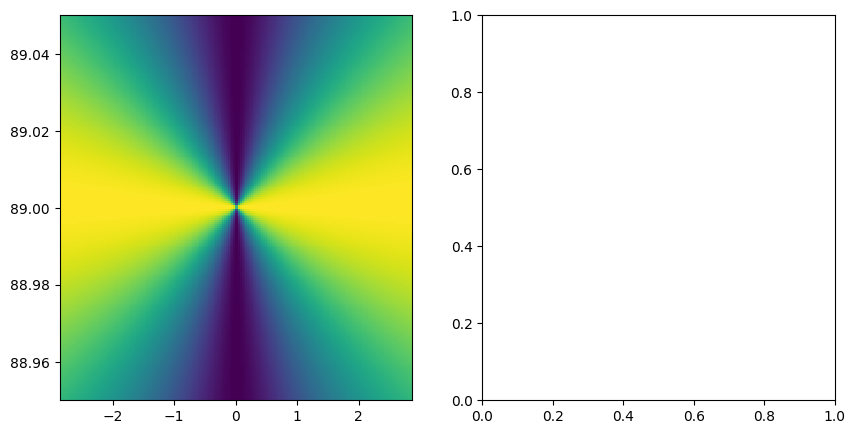

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def r(d):
    return d * np.pi / 180

def dist_hav(x, y, x0, y0):
    dlat = r(y - y0)
    dlon = r(x - x0)
    a = np.sin(dlat / 2)**2 + np.cos(r(y0)) * np.cos(r(y)) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c

def dist_sim(x, y, x0, y0):
    return 6371 * np.sqrt((r(y - y0)**2) + (np.cos(r(y0)) * (r(x - x0))**2))

def error(x, y, x0, y0):
    return 100 * np.abs(dist_hav(x, y, x0, y0) - dist_sim(x, y, x0, y0)) / dist_hav(x, y, x0, y0)

# set up the figure and subplots
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, )
ax2 = fig.add_subplot(1, 2, 2)

# set the ranges and contour levels
x = np.linspace(-0.05 / np.cos(r(89)), 0.05 / np.cos(r(89)), 200)
y = np.linspace(89 - 0.05, 89 + 0.05, 200)
X, Y = np.meshgrid(x, y)
Z = error(X, Y, 0, 89)

# create the heatmap
heatmap = ax1.pcolormesh(X, Y, Z, cmap='viridis')

# set the viewing angle
ax1.view_init(elev=90, azim=0)

# add the colorbar
cbar = plt.colorbar(heatmap)

# set the title and axis labels
ax1.set_title('Relative error at 89°N')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
cbar.set_label('Relative error (%)')

# create the contour plot
cp = ax2.contourf(X, Y, Z, levels=5, cmap='viridis')

# set the title and axis labels
ax2.set_title('Relative error at 89°N')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
cbar = plt.colorbar(cp)
cbar.set_label('Relative error (%)')

# show the plot
plt.show()